# Implementación de algoritmo de regresión con bosques aleatorios (random forest regression) para predicción de la humedad de un secador de Maíz.

Equipo👥:
* Adrian Garay
* Oscar Nava
* Gonzalo Peralta
* Miguel Solis

Profesor🎓:
* Dr. Juan Diego Sánchez Torres
---


## <font color= blue> 1. Preparación de la base de datos.</font>

Realizamos el mismo tratamiento a la base de datos que en los modelos de regresión lineal, es decir, eliminando las características seleccionadas en el análisis operativo, cambiando las variables categoricas o de estado a valores numericos y eliminando los outliers encontrados en la regresión lineal.

Primero importamos la librerias a utilizar:

In [2]:
#Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import svm


Se carga la base de datos y se obtiene información de la misma:

In [4]:
#Mandar llamar datos
ruta = "/Users/agaray/Google Drive/1.Maestría/5.TOG/1.IDI III/"
#ruta = "/Users/adrian.garay/Downloads/"
data = pd.read_excel(ruta + "Dataset_Secador_gluten_Rev1.xlsx",  sheet_name='Dataset') #index_col = 'Timestamp')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               3416 non-null   datetime64[ns]
 1   Humedad                 3416 non-null   float64       
 2   Nivel_RVF_1             3416 non-null   float64       
 3   RPM_RVF_1               1133 non-null   float64       
 4   Nivel_RVF_2             3416 non-null   float64       
 5   RPM_RVF_2               1133 non-null   float64       
 6   Nivel_RVF_3             3416 non-null   float64       
 7   RPM_RVF_3               1133 non-null   float64       
 8   Nivel_RVF_4             3416 non-null   float64       
 9   RPM_RVF_4               1133 non-null   float64       
 10  Nivel_RVF_5             3416 non-null   float64       
 11  RPM_RVF_5               1133 non-null   float64       
 12  Nivel_RVF_6             3416 non-null   float64 

In [5]:
data.head()

,Timestamp,Humedad,Nivel_RVF_1,RPM_RVF_1,Nivel_RVF_2,RPM_RVF_2,Nivel_RVF_3,RPM_RVF_3,Nivel_RVF_4,RPM_RVF_4,...,Damper_atm,Damper_scrubber,Motor_Secador,Motor_ventilador_humos,Motor_soplador_reciclo,Motor_gusano_descarga,Motor_rastra_descarga,Molino_salida_1,Molino_salida_2,Presion_filtro_bolsa
0,2021-08-30 18:00:00,11.73,80.050659,605.364197,80.820549,1095.614136,79.571754,1103.628052,82.641441,1104.338379,...,0.0,100,16.591389,115.558098,23.957436,2.923200,3.284385,78.458809,0.355693,1.652562
1,2021-08-30 16:00:00,11.92,79.908173,604.416504,80.360100,1095.500122,80.362831,1103.250244,81.118835,1105.887573,...,0.0,100,16.063402,116.945450,23.388823,2.839568,3.146695,61.052021,0.353825,1.613900
2,2021-08-30 14:00:00,11.34,79.820709,605.360840,79.486443,1094.885498,79.600456,1102.720581,81.208038,1104.568359,...,0.0,100,16.465736,118.435463,23.524975,2.846484,3.305407,56.834660,0.351780,1.783668
3,2021-08-30 12:00:00,12.44,81.118042,605.027405,79.318466,1095.123413,80.230881,1103.237427,78.008667,1104.330566,...,0.0,100,15.525600,114.675354,23.901539,2.823379,3.183444,58.261257,0.349322,1.665779
4,2021-08-30 10:00:00,10.61,80.179375,603.886353,80.531776,1095.653687,79.327095,1103.027710,78.008530,1106.229614,...,0.0,100,15.887411,116.380211,23.936207,2.861648,3.148321,64.321579,0.346864,1.947744


A continuación cambiamos el estado de las variables tipo objeto. Esto para cambiar los valores a 1s y 0s:

In [6]:
#Modificar los estados de las varibles independientes "Triturador_1" y "Triturador_2".
data[['Triturador_1','Triturador_2', 'Triturador_1_Bypass', 'Triturador_2_Bypass']] = data[['Triturador_1','Triturador_2', 'Triturador_1_Bypass', 'Triturador_2_Bypass']].replace(['Active'],1).replace(['Inactive'],0).replace(['Open'],1).replace(['Closed'],0)
data[['Triturador_1','Triturador_2', 'Triturador_1_Bypass', 'Triturador_2_Bypass']].head()

,Triturador_1,Triturador_2,Triturador_1_Bypass,Triturador_2_Bypass
0,1,1,1,0
1,1,1,1,0
2,1,1,1,0
3,1,1,1,0
4,1,1,1,0


Quitamos del dataset las variables con datos vacíos:

In [7]:
#Eliminar variables del Dataset original de acuerdo a análisis previos para Random Forest:
dataSVM = data.copy()
dataSVM = dataSVM.drop(['Motor_ventilador_humos'],axis = 1).drop(['Flujo_aire'],axis = 1) 
dataSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               3416 non-null   datetime64[ns]
 1   Humedad                 3416 non-null   float64       
 2   Nivel_RVF_1             3416 non-null   float64       
 3   RPM_RVF_1               1133 non-null   float64       
 4   Nivel_RVF_2             3416 non-null   float64       
 5   RPM_RVF_2               1133 non-null   float64       
 6   Nivel_RVF_3             3416 non-null   float64       
 7   RPM_RVF_3               1133 non-null   float64       
 8   Nivel_RVF_4             3416 non-null   float64       
 9   RPM_RVF_4               1133 non-null   float64       
 10  Nivel_RVF_5             3416 non-null   float64       
 11  RPM_RVF_5               1133 non-null   float64       
 12  Nivel_RVF_6             3416 non-null   float64 

Se eliminan las velocidades de los filtros rotativos:

In [8]:
#Eliminar variables del Dataset original de acuerdo a análisis previos para Random Forest:
dataSVM = dataSVM.drop(['RPM_RVF_1','RPM_RVF_2','RPM_RVF_3','RPM_RVF_4','RPM_RVF_5','RPM_RVF_6'],axis = 1)
dataSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               3416 non-null   datetime64[ns]
 1   Humedad                 3416 non-null   float64       
 2   Nivel_RVF_1             3416 non-null   float64       
 3   Nivel_RVF_2             3416 non-null   float64       
 4   Nivel_RVF_3             3416 non-null   float64       
 5   Nivel_RVF_4             3416 non-null   float64       
 6   Nivel_RVF_5             3416 non-null   float64       
 7   Nivel_RVF_6             3416 non-null   float64       
 8   Triturador_1            3416 non-null   int64         
 9   Triturador_2            3416 non-null   int64         
 10  Triturador_1_A          3416 non-null   float64       
 11  Triturador_2_A          3416 non-null   float64       
 12  Triturador_1_Bypass     3416 non-null   int64   

Finalmente, se elimina el flujo de gas por ser descrito a traves de la caracteristica TE:

In [9]:
#Eliminar variables del Dataset original de acuerdo a análisis previos para Random Forest:
dataSVM = dataSVM.drop(['Flujo_gas'],axis = 1)
dataSVM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               3416 non-null   datetime64[ns]
 1   Humedad                 3416 non-null   float64       
 2   Nivel_RVF_1             3416 non-null   float64       
 3   Nivel_RVF_2             3416 non-null   float64       
 4   Nivel_RVF_3             3416 non-null   float64       
 5   Nivel_RVF_4             3416 non-null   float64       
 6   Nivel_RVF_5             3416 non-null   float64       
 7   Nivel_RVF_6             3416 non-null   float64       
 8   Triturador_1            3416 non-null   int64         
 9   Triturador_2            3416 non-null   int64         
 10  Triturador_1_A          3416 non-null   float64       
 11  Triturador_2_A          3416 non-null   float64       
 12  Triturador_1_Bypass     3416 non-null   int64   

Asi, tenemos una salida **Humedad** con 24 características.

Continuamos eliminando los outliers del analisis de regresión lineal:

In [10]:
#Eliminar outliers del Dataset original de acuerdo a análisis previos para Random Forest:
dataSVM = dataSVM.drop([ 2232, 2086, 537, 3173, 2961, 2232, 2818],axis=0)
dataSVM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3415
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               3410 non-null   datetime64[ns]
 1   Humedad                 3410 non-null   float64       
 2   Nivel_RVF_1             3410 non-null   float64       
 3   Nivel_RVF_2             3410 non-null   float64       
 4   Nivel_RVF_3             3410 non-null   float64       
 5   Nivel_RVF_4             3410 non-null   float64       
 6   Nivel_RVF_5             3410 non-null   float64       
 7   Nivel_RVF_6             3410 non-null   float64       
 8   Triturador_1            3410 non-null   int64         
 9   Triturador_2            3410 non-null   int64         
 10  Triturador_1_A          3410 non-null   float64       
 11  Triturador_2_A          3410 non-null   float64       
 12  Triturador_1_Bypass     3410 non-null   int64   

Este es el dataset que utilizaremos en el algoritmo Support vector machine.

## <font color= blue> 2. Implementación de la regresión con maquinas de soporte vector (Support Vector Machine).</font>

### Support vector machine sin datos normalizados

Primero comenzamos graficando la humedad para compararla posteriormente con la predicción obtenida con el modelo:

Text(0.5, 1.0, 'Humedad del Gluten de Maíz')

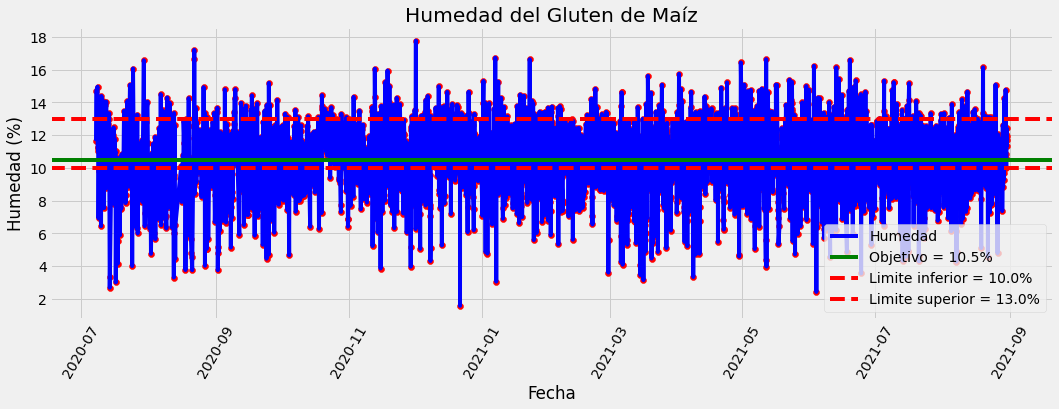

In [11]:
# Plot the actual values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
plt.scatter(dataSVM['Timestamp'], dataSVM['Humedad'], color ='r')
plt.plot(dataSVM['Timestamp'], dataSVM['Humedad'], linestyle='solid',color='b', label = 'Humedad')
plt.axhline(y=10.5, xmin=0, xmax=1, color='g', linestyle='-', label = 'Objetivo = 10.5%')
plt.axhline(y=10, xmin=0, xmax=1, color='r', linestyle='--', label = 'Limite inferior = 10.0%')
plt.axhline(y=13, xmin=0, xmax=1, color='r', linestyle='--', label = 'Limite superior = 13.0%')
plt.xticks(rotation = '60')
plt.legend()
plt.xlabel('Fecha'); plt.ylabel('Humedad (%)'); plt.title('Humedad del Gluten de Maíz')

Obtenemos las características (X) y la variable a predecir (y, salida) como arreglos de numpy para uso en el algoritmo:

In [12]:
#Variable a predecir y
ySVM = dataSVM['Humedad']#np.array(dataRF['Humedad'])

#Características X
XSVM = dataSVM.iloc[:,2:]#np.array(dataRF.iloc[:,2:])

#Lista con nombre de las caracteristicas para uso en gráficas
caracteristicas = list(dataSVM.iloc[:,2:].columns)

Creamos datos de entrenamiento y prueba:

In [13]:
XSVM_train, XSVM_test, ySVM_train, ySVM_test = train_test_split(XSVM,ySVM, test_size = 0.2, random_state = 42)

Entrenamos el modelo usando la librería Scikit-learn para algoritmo Random Forest Regression:

In [14]:
#Instanciamos el modelo con 1000 arboles de decisión
SVM = svm.SVR(kernel='rbf')
#Entrenamos el modelo
SVM.fit(XSVM_train, ySVM_train)

SVR()

Usamos el modelo para predecir la Humedad con los datos de prueba:

In [15]:
ySVM_predict = SVM.predict(XSVM_test)

Comparamos el modelo con los de regresión lineal a traves del error cuadratico medio:

In [16]:
mean_squared_error(ySVM_test, ySVM_predict)  #Error minimo cuadrado cerca de 3.55.

4.214698137658437

Finalmente, para evaluar el algoritmo calculamos la precisión del modelo (accuracy):

In [17]:
# Calculate mean absolute percentage error (MAPE)
mapeSVM = 100 * (abs(ySVM_predict - ySVM_test.values) / ySVM_test.values)
# Calculate and display accuracy
accSVM = 100 - np.mean(mapeSVM)
print('Accuracy:', round(accSVM, 2), '%.')

Accuracy: 82.22 %.


El cual es un resultado aceptable como indicación, pero no para efectos de control. Esto sumado a que el PLC no es capaz de ejecutar este algoritmo.

Vemos este resultado de manera grafica:

Text(0.5, 1.0, 'Valores medidos vs. predicciones')

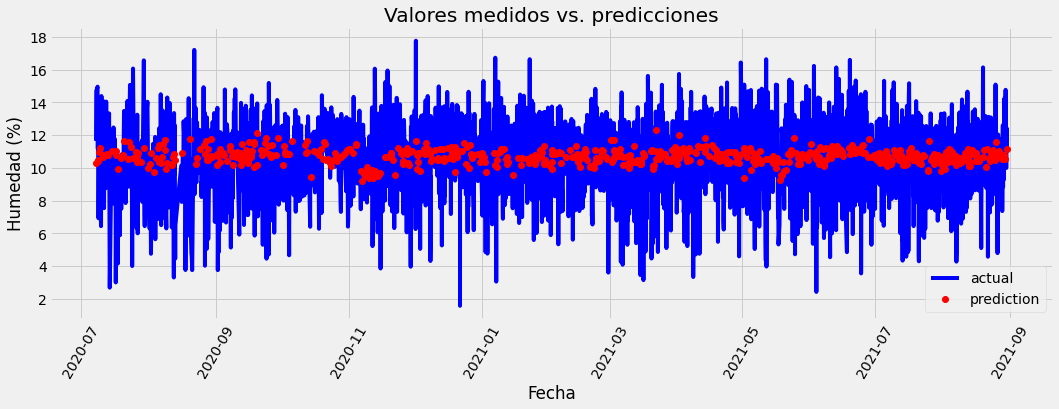

In [18]:
# Dataframe with predictions and dates
predictions_data = XSVM_test.join(dataSVM['Timestamp']).assign(y_predict = ySVM_predict)
# Plot the actual values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
plt.plot(dataSVM['Timestamp'], dataSVM['Humedad'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['Timestamp'], predictions_data['y_predict'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Humedad (%)'); plt.title('Valores medidos vs. predicciones')

Para descartar que los rangos de las caracteristicas tengan influencia, se van a normalizar los datos.

### SVM con datos normalizados

Normalizamos los datos de prueba y entrenamiento:

In [19]:
XSVMN_train = XSVM_train.copy()
XSVMN_test = XSVM_test.copy()
ySVMN_train = ySVM_train.copy()
ySVMN_test = ySVM_test.copy()

In [20]:
#Normalizar las caracteristicas.
XSVMN_train_columns = XSVMN_train.columns
for i in XSVMN_train_columns:
    XSVMN_train.loc[:,(i)] = (XSVMN_train.loc[:,(i)] - XSVMN_train.loc[:,(i)].min()) / (XSVMN_train.loc[:,(i)].max() - XSVMN_train.loc[:,(i)].min())

for i in XSVMN_train_columns:
    XSVMN_test.loc[:,(i)] = (XSVMN_test.loc[:,(i)] - XSVMN_test.loc[:,(i)].min()) / (XSVMN_test.loc[:,(i)].max() - XSVMN_test.loc[:,(i)].min())

In [21]:
#Normalizar la salida.
ySVMN_train = (ySVMN_train - ySVMN_train.min()) / (ySVMN_train.max() - ySVMN_train.min())
ySVMN_test = (ySVMN_test - ySVMN_test.min()) / (ySVMN_test.max() - ySVMN_test.min())

In [22]:
#Para grafica normalizar humedad.
dataplotN = data.copy()
dataplotN = dataplotN.iloc[:,0:2]
dataplotN['Humedad'] = (dataplotN['Humedad'] - dataplotN['Humedad'].min()) / (dataplotN['Humedad'].max() - dataplotN['Humedad'].min())
dataplotN

,Timestamp,Humedad
0,2021-08-30 18:00:00,0.627160
1,2021-08-30 16:00:00,0.638889
2,2021-08-30 14:00:00,0.603086
3,2021-08-30 12:00:00,0.670988
4,2021-08-30 10:00:00,0.558025
...,...,...
3411,2020-07-08 17:15:00,0.585802
3412,2020-07-08 10:34:00,0.595062
3413,2020-07-08 09:44:00,0.826543
3414,2020-07-07 19:18:00,0.809876


Entrenamos el modelo:

In [23]:
#Instanciamos el modelo con 1000 arboles de decisión
SVMN = svm.SVR(kernel='rbf')
#Entrenamos el modelo
SVMN.fit(XSVMN_train, ySVMN_train)

SVR()

Usamos el modelo para predecir:

In [24]:
ySVMN_predict = SVMN.predict(XSVMN_test)

Regresamos los datos al rango de operación:

In [32]:
#Regresando las predicciones al rango de operación
ySVMN_pr = (ySVMN_predict*(max(ySVM_test) - min(ySVM_test))) + min(ySVM_test)
ySVMN_pr

array([10.32236688, 11.69130872, 10.31612896, 13.04030848, 11.39532142,
       11.59795087, 11.65557279, 12.05235256, 10.67367711, 13.54334355,
       10.42657267, 10.5271238 , 11.69112639, 12.28562423, 12.73599367,
       11.29942819, 11.78852649, 12.24868754, 11.97142963, 11.03784088,
       11.10778898, 10.72113552, 13.82106752, 12.63757849, 13.62672477,
       13.14050703, 13.07830907, 13.49971585, 12.63653363, 10.71169266,
       13.50456924, 11.67156959, 10.76407441, 10.83198181, 10.88364985,
       12.96260635, 11.18663531, 10.23211881, 10.59443819, 10.8845864 ,
       12.29403416, 10.69484666, 12.4371624 , 11.64850805, 11.95404135,
       12.06341623,  9.79213389, 12.19647144, 12.01691795, 12.10996531,
       13.48954966, 12.1186856 , 12.26048963, 12.64817668, 12.46448802,
       11.61726769, 14.52053843, 12.65009072, 12.08195001, 12.78268021,
       12.76795772, 11.77645309,  9.91515328, 11.54849965, 10.54850908,
       11.45959064, 11.5447954 , 11.35001008, 10.80955216, 10.20

Comparamos el modelo a traves del error cuadratico medio:

In [34]:
mean_squared_error(ySVM_test, ySVMN_pr)

6.22452278293262

Obtenemos la precisión:

In [35]:
# Calculate mean absolute percentage error (MAPE)
mapeSVMN = 100 * (abs(ySVMN_pr - ySVM_test.values) / ySVM_test.values)
# Calculate and display accuracy
accSVMN = 100 - np.mean(mapeSVMN)
print('Accuracy:', round(accSVMN, 2), '%.')

Accuracy: 77.2 %.


Graficamos resultado:

Text(0.5, 1.0, 'Valores medidos vs. predicciones')

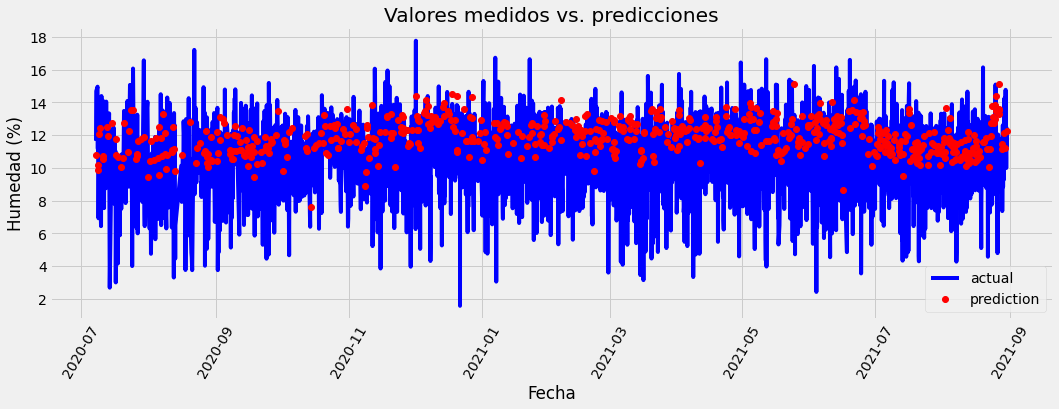

In [36]:
# Dataframe with predictions and dates
predictions_dataN = XSVM_test.join(dataSVM['Timestamp']).assign(y_predict = ySVMN_pr)
# Plot the actual values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
plt.plot(dataSVM['Timestamp'], dataSVM['Humedad'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_dataN['Timestamp'], predictions_dataN['y_predict'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Humedad (%)'); plt.title('Valores medidos vs. predicciones')

### SVM con logaritmo aplicado a la salida.

Aplicamos el logaritmo a la salida:

In [ ]:
lnySVM_train = np.log(ySVM_train.copy())
lnySVM_test = np.log(ySVM_test.copy())

Creamos copia de los datos de caracteristicas:

In [ ]:
XSVMln_train = XSVMN_train.copy()
XSVMln_test = XSVMN_test.copy()

Entrenamos el modelo:

In [ ]:
#Instanciamos el modelo con 1000 arboles de decisión
SVMln = svm.SVR(kernel='rbf')
#Entrenamos el modelo
SVMln.fit(XSVMln_train, lnySVM_train)

SVR()

Usamos el modelo para predecir:

In [ ]:
lnySVM_predict = SVMln.predict(XSVMln_test)

In [ ]:
expySVM_predict = np.exp(lnySVM_predict)

Comparamos el modelo a traves del error cuadratico medio:

In [ ]:
mean_squared_error(ySVM_test, expySVM_predict)  #Error minimo cuadrado cerca de 0.02237.

8.520803806624789

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mapeSVMln = 100 * (abs(expySVM_predict - ySVM_test.values) / ySVM_test.values)
# Calculate and display accuracy
accSVMln = 100 - np.mean(mapeSVMln)
print('Accuracy:', round(accSVMln, 2), '%.')

Accuracy: 73.02 %.


Text(0.5, 1.0, 'Valores medidos vs. predicciones')

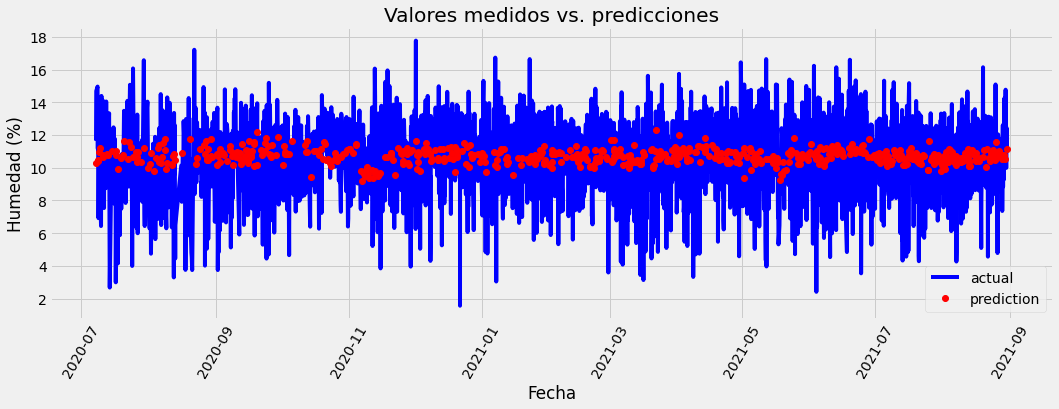

In [ ]:
# Dataframe with predictions and dates
predictions_dataN = XSVMln_test.join(dataSVM['Timestamp']).assign(y_predict = expySVM_predict)
# Plot the actual values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
plt.plot(dataSVM['Timestamp'], dataSVM['Humedad'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_data['Timestamp'], predictions_data['y_predict'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Humedad (%)'); plt.title('Valores medidos vs. predicciones')

### Symbolic Transformer para caracteristicas

Un symbolic transformer es un transformer supervisado que comienza construyendo una población fórmulas aleatorias naive para representar una relación.

In [42]:
from gplearn.genetic import SymbolicTransformer

Corremos el SymbolicTransfomer.

In [43]:
function_set = ['add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv',
                'max', 'min']
gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         function_set=function_set,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         random_state=0, n_jobs=3)
gp.fit(XSVMN_train, ySVMN_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.37        0.0493865        3         0.343844         0.230883      2.10m
   1     6.78         0.177814        5         0.363737         0.323742     30.61s
   2     3.40         0.303733       12         0.377626         0.242741     27.77s
   3     4.29          0.30778        9         0.385104         0.342561     26.39s
   4     7.59         0.291752       17         0.395717         0.326108     30.09s
   5     9.27         0.310973       14         0.406494         0.301026     25.27s
   6    11.76         0.329991       23         0.410122         0.373445     22.97s
   7    13.76         0.336051       23         0.412915         0.350935     20.58s
   8    16.37         0.338763       36          0.41817         0.296603  

SymbolicTransformer(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                  'abs', 'neg', 'inv', 'max', 'min'],
                    max_samples=0.9, n_jobs=3, parsimony_coefficient=0.0005,
                    population_size=2000, random_state=0, verbose=1)

In [44]:
#Normalizar X
XSVMN = dataSVM.iloc[:,2:]



XSVMN_columns = XSVMN.columns
for i in XSVMN_columns:
    XSVMN.loc[:,(i)] = (XSVMN.loc[:,(i)] - XSVMN.loc[:,(i)].min()) / (XSVMN.loc[:,(i)].max() - XSVMN.loc[:,(i)].min())

    
XSVMN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3410 entries, 0 to 3415
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nivel_RVF_1             3410 non-null   float64
 1   Nivel_RVF_2             3410 non-null   float64
 2   Nivel_RVF_3             3410 non-null   float64
 3   Nivel_RVF_4             3410 non-null   float64
 4   Nivel_RVF_5             3410 non-null   float64
 5   Nivel_RVF_6             3410 non-null   float64
 6   Triturador_1            3410 non-null   float64
 7   Triturador_2            3410 non-null   float64
 8   Triturador_1_A          3410 non-null   float64
 9   Triturador_2_A          3410 non-null   float64
 10  Triturador_1_Bypass     3410 non-null   float64
 11  Triturador_2_Bypass     3410 non-null   float64
 12  TE                      3410 non-null   float64
 13  TS                      3410 non-null   float64
 14  Draft                   3410 non-null   

In [45]:
gp_featuresXSVMN_train = gp.transform(XSVMN_train)
new_XSVMN_train = np.hstack((XSVMN_train, gp_featuresXSVMN_train))

new_XSVMN_train = pd.DataFrame(new_XSVMN_train, index = XSVMN_train.index)

new_XSVMN_train

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
2588,0.816888,0.876044,0.698050,0.921756,0.765392,0.783251,1.0,0.0,0.083395,0.000000,...,1.614151,1.508643,0.484027,0.619521,0.640764,1.223728,1.614151,0.895820,1.709162,1.358143
2031,0.728777,0.822335,0.754233,0.753358,0.733012,0.754451,1.0,0.0,0.087533,0.000000,...,1.922084,2.060005,1.188777,0.520269,0.540892,1.650309,1.922084,1.432067,1.457345,1.776348
2081,0.724026,0.828609,0.750112,0.754885,0.729147,0.746786,1.0,0.0,0.087937,0.000000,...,1.550249,1.587638,0.594590,0.645058,0.664874,1.195243,1.550249,0.902331,1.783378,1.294057
2174,0.870223,0.882191,0.896412,0.150578,0.103240,0.808278,1.0,0.0,0.088569,0.000000,...,1.833130,1.759367,0.846754,0.545515,0.582132,1.465130,1.833130,1.246672,1.509289,1.576004
2463,0.726547,0.796411,0.573171,0.891818,0.789295,0.807773,1.0,0.0,0.134213,0.000000,...,2.358313,2.438598,1.684746,0.424032,0.450314,2.103621,2.358313,1.955604,1.219339,2.216667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.769901,0.875304,0.799597,0.798292,0.789364,0.747973,1.0,0.0,0.081495,0.000000,...,1.286370,1.165222,-0.097552,0.777381,0.764686,0.970271,1.286370,0.358278,2.086548,0.984702
1131,0.302569,0.871901,0.809953,0.813135,0.783934,0.760402,1.0,0.0,0.084725,0.000000,...,1.492227,1.829933,0.833705,0.670139,0.623869,1.114645,1.492227,1.136507,1.770520,1.306526
1295,0.763233,0.872587,0.789499,0.710703,0.784400,0.809104,1.0,0.0,0.083957,0.000000,...,1.258587,1.073204,-0.214251,0.794542,0.795138,0.931794,1.258587,0.194015,2.203252,0.902780
861,0.760429,0.893315,0.796000,0.808195,0.767364,0.782121,1.0,0.0,0.202528,0.000000,...,1.539754,1.484467,0.435363,0.649454,0.662828,1.165589,1.539754,0.824649,1.785515,1.302611


In [46]:
gp_featuresXSVMN_test = gp.transform(XSVMN_test)
new_XSVMN_test = np.hstack((XSVMN_test, gp_featuresXSVMN_test))

new_XSVMN_test = pd.DataFrame(new_XSVMN_test, index = XSVMN_test.index)

new_XSVMN_test

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
3140,0.724068,0.829047,0.834406,0.805513,0.808871,0.802234,0.0,1.0,0.000000,0.226303,...,1.471452,1.453600,0.417823,0.679601,0.700478,1.098427,1.471452,0.704395,1.900381,1.182105
1790,0.797680,0.881601,0.887069,0.888599,0.802135,0.797004,1.0,0.0,0.257337,0.000000,...,1.246356,1.009606,-0.338999,0.802339,0.821145,0.945093,1.246356,0.020498,2.327195,0.815657
170,0.158775,0.971311,0.829685,0.825992,0.782583,0.800202,0.0,1.0,0.000000,0.281003,...,1.276160,1.473244,0.439960,0.783601,0.691808,1.084940,1.276160,0.472704,1.974040,1.157099
681,0.784408,0.891476,0.828759,0.796357,0.796785,0.801667,1.0,0.0,0.451563,0.000000,...,1.299071,1.131492,-0.084516,0.769781,0.781927,0.936896,0.755442,0.257652,2.159235,0.938754
2806,0.902546,0.914895,0.808586,0.902220,0.806101,0.684141,0.0,1.0,0.000000,0.285428,...,1.349758,1.081108,-0.139310,0.740874,0.770925,0.937457,1.349758,0.240275,2.125977,0.926261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,0.742463,0.848866,0.936187,0.907486,0.793727,0.809617,1.0,0.0,0.589871,0.000000,...,1.385511,1.245333,0.112391,0.721755,0.741534,0.962744,1.385511,0.419481,2.054096,1.054806
1221,0.824173,0.918278,0.315734,0.875098,0.806498,0.104242,1.0,0.0,0.253137,0.000000,...,1.316565,1.265883,0.090740,0.759552,0.759207,1.130999,1.316565,0.475909,2.024100,1.018121
573,0.581214,0.905059,0.782680,0.776502,0.794309,0.806058,0.0,1.0,0.000000,0.241154,...,1.277247,1.354927,0.157743,0.782934,0.738477,1.107347,1.277247,0.566214,2.016549,1.076958
1546,0.860378,0.892732,0.905838,0.913802,0.794286,0.804620,1.0,0.0,0.366539,0.000000,...,0.903809,0.882717,-0.864159,0.869423,0.789293,0.912414,0.903809,-0.283079,2.632656,0.671991


Corremos el SVM.

In [47]:
SVMgp = svm.SVR(kernel='rbf')
#Entrenamos el modelo
SVMgp.fit(new_XSVMN_train, ySVMN_train)

SVR()

Usamos el modelo para predecir:

In [48]:
new_ySVMN_predict = SVMgp.predict(new_XSVMN_test)

Regresamos los datos al rango de operación:

In [49]:
#Regresando las predicciones al rango de operación
new_ySVMN_pr = (new_ySVMN_predict*(max(ySVM_test) - min(ySVM_test))) + min(ySVM_test)
new_ySVMN_pr

array([10.9935133 , 11.46841621, 10.62658251, 12.91479844, 11.00296241,
       11.35980766, 11.40305456, 11.66374689, 11.0172968 , 12.26738917,
       11.03125719, 10.48172377, 11.55915761, 11.26078893, 12.3343835 ,
       11.20299288, 11.39324559, 11.61880523, 11.93984822, 11.53602391,
       11.67174149, 11.08624726, 13.02356339, 12.53266417, 12.69400771,
       12.4168704 , 12.20384062, 12.10595011, 12.07063658, 11.72813231,
       11.86567976, 10.96415944, 10.65492697, 11.02540581, 10.66456527,
       11.76529664, 11.20022863, 10.64009608, 11.79407925, 11.39365914,
       12.31403921, 10.77033104, 11.73029015, 11.80826271, 11.8312983 ,
       11.25291644, 11.29891274, 11.70429066, 10.90743565, 11.79829551,
       12.09275112, 12.20033577, 11.20965648, 12.62994126, 12.2642193 ,
       11.27945352, 12.49671785, 12.23359407, 11.75578333, 11.79480065,
       11.71690334, 11.71330652, 10.43590989, 11.70098568, 10.85956625,
       11.45804242, 11.9518328 , 11.60121823, 11.10276085, 11.09

Comparamos el modelo a traves del error cuadratico medio:

In [50]:
mean_squared_error(ySVM_test, new_ySVMN_pr)

5.499504206617626

In [51]:
# Calculate mean absolute percentage error (MAPE)
mapeSVMgp = 100 * (abs(new_ySVMN_pr - ySVM_test.values) / ySVM_test.values)
# Calculate and display accuracy
accSVMgp = 100 - np.mean(mapeSVMgp)
print('Accuracy:', round(accSVMgp, 2), '%.')

Accuracy: 78.65 %.


Text(0.5, 1.0, 'Valores medidos vs. predicciones')

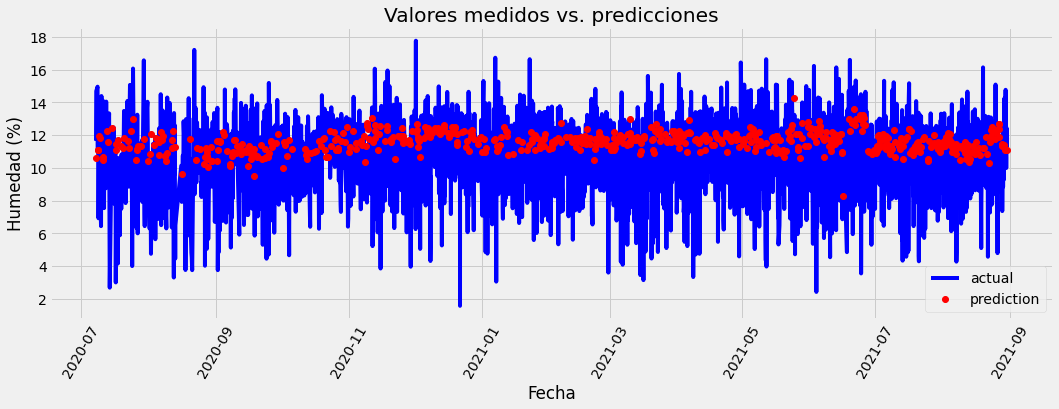

In [53]:
# Dataframe with predictions and dates
predictions_dataN = XSVM_test.join(dataSVM['Timestamp']).assign(y_predict = new_ySVMN_pr)
# Plot the actual values
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,5))
plt.plot(dataSVM['Timestamp'], dataSVM['Humedad'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot(predictions_dataN['Timestamp'], predictions_dataN['y_predict'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
# Graph labels
plt.xlabel('Fecha'); plt.ylabel('Humedad (%)'); plt.title('Valores medidos vs. predicciones')